# Simple Outlier and Anomaly Detection

The purpose of anomaly detection is to find novelty in a data set, which may indicate good or bad data points. These special data points can then be used to set up problem statements for either improving a system, or for solving problems related to it.

We'll deal with the following kinds of tests and approaches to understand anomaly detection in the context of aggregate data and time series.

1. Simple outlier detection based on MAD and Percentiles
2. Simple outlier detection based on moving averages
3. One class SVM for unsupervised outlier detection



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels as sm

## Simple outlier visualization based on box plots

In [2]:
x = np.matrix(np.random.normal(10,1,5000)).reshape(1000,5)

In [3]:
columns = ['x1', 'x2', 'x3', 'x4', 'x5']
index = pd.date_range(start="2013-01-01", periods=len(x))

In [4]:
x = pd.DataFrame(x, columns=columns, index=index)

In [5]:
x.head()

,x1,x2,x3,x4,x5
2013-01-01,10.968353,11.077621,11.937900,10.273728,10.365939
2013-01-02,11.228849,10.872591,9.928910,9.859217,9.850151
2013-01-03,10.793156,11.625050,10.462840,9.165417,8.318714
2013-01-04,8.878143,10.091168,9.597379,11.152919,9.299585
2013-01-05,9.652568,9.821427,8.321030,10.627276,9.933796


In [6]:
x.describe()

,x1,x2,x3,x4,x5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.986699,9.975827,10.012065,10.015056,9.948926
std,0.973173,0.970852,0.971623,0.991195,0.985065
min,7.094537,7.107725,6.193707,6.570933,7.128003
25%,9.315298,9.325783,9.388793,9.372055,9.263461
50%,10.016732,9.978081,10.008997,9.984829,9.946413
75%,10.694233,10.633935,10.625542,10.665917,10.612351
max,12.975331,13.167340,13.527295,13.089788,12.747437


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac3d68b850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fac0e777310>], dtype=object)

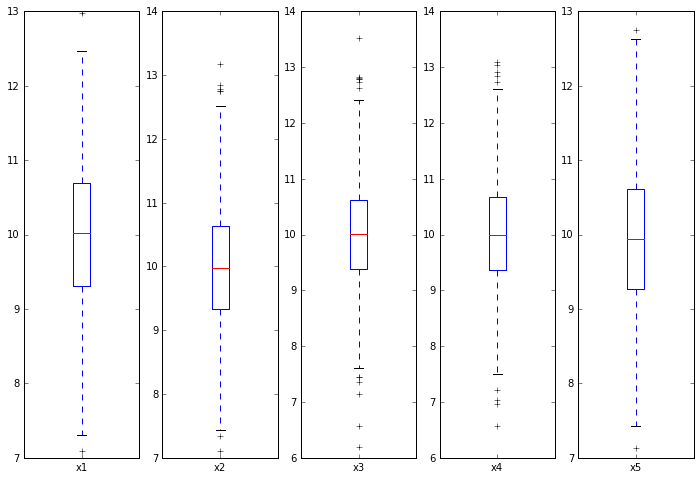

In [7]:
x.plot(kind="box", subplots=True, figsize=(12,8))

Here, we can see that each of these series exhibit some kind of outlier pattern. Some series have more outliers than others but all seem to.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0e80a350>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fac0e400fd0>], dtype=object)

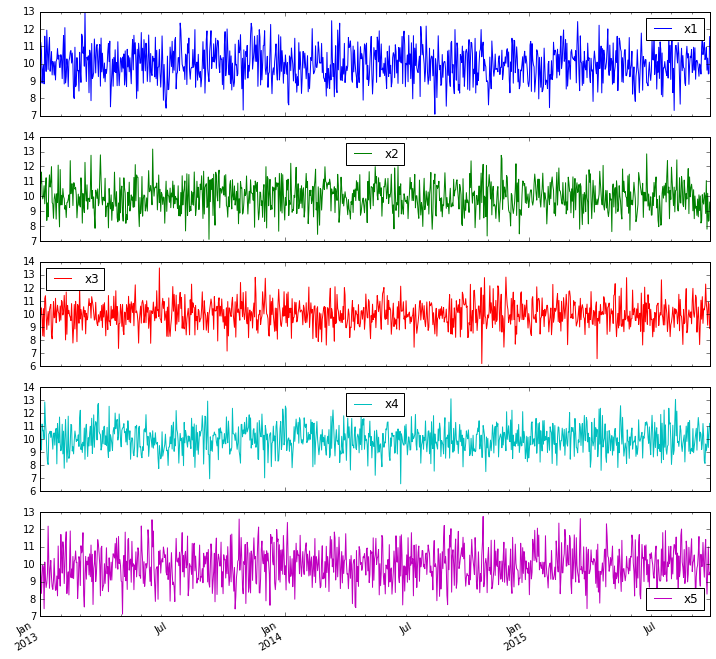

In [8]:
x.plot(kind = "line", subplots=True, figsize=(12,12))

## Definition of outlier

The box plot shown above has median values indicated with the red lines, and the "box" at the centre indicates the middle 50% of the data in each column. The "whiskers" above and below each box indicate 1.5 times the inter-quartile range ($IQR$) from the median position.

**In traditional statistical practice, the points that lie beyond these whiskers in a box plot are considered outliers.**

There are statistical tests which can help determine these outliers. Some of these tests are:
1. Dixon's Q test
2. Chi-square test for outliers

These tests are generally used for smaller data sets of the order of 100 points or fewer.

We can also set up percentile based anomaly detection, as below.

## Plots of data with outliers

By defining a function to calculate the outliers (based on percentiles), we can plot outliers along with series.

## Percentile based Anomaly Detection

### Function to find anomalies based on percentiles in a series

In [9]:
def percentile_anomalies(A, perc_tuple):
    P = np.percentile(A.values, perc_tuple)
    def outlier_booleans(value, lower= P[0], upper= P[1]):
        if (value < lower) or (value > upper):
            return True
        else:
            return False
    return map(outlier_booleans, A)

### Function to plot series and anomalies based on percentiles

In [10]:
def plot_data_percentile_outliers(series,percentiles):
    outliers = series[percentile_anomalies(series,percentiles)]
    plt.figure(figsize = (12,8))
    plt.title("Series and percentile based outliers in column "+series.name)
    plt.scatter(x = outliers.index, y = outliers.values, c="r")
    plt.plot(series, c = "lightblue")
    plt.show()

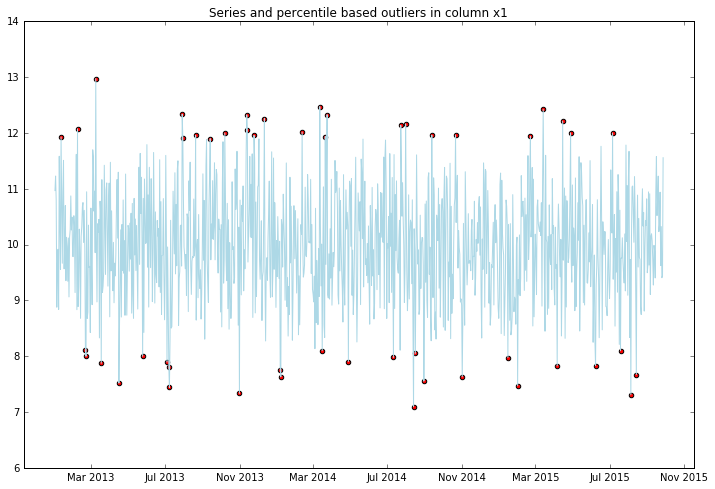

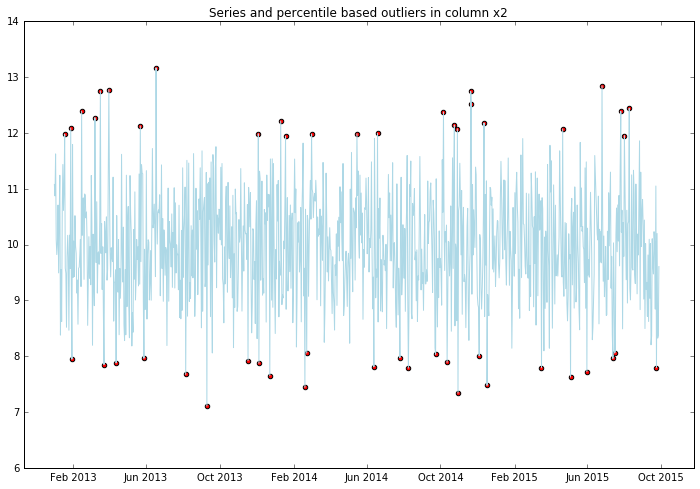

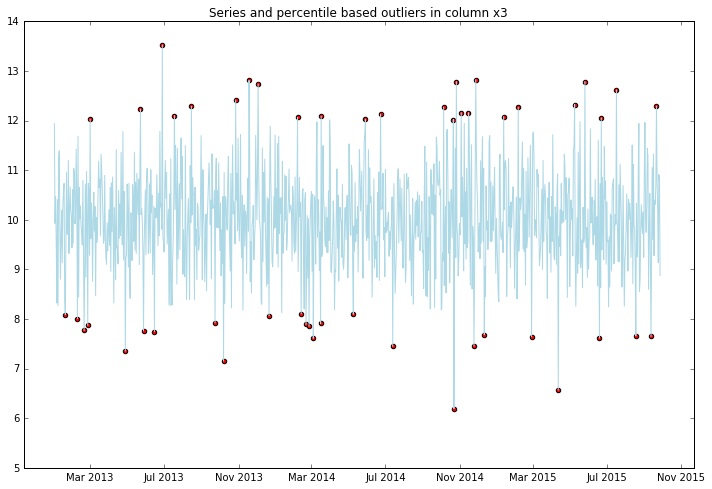

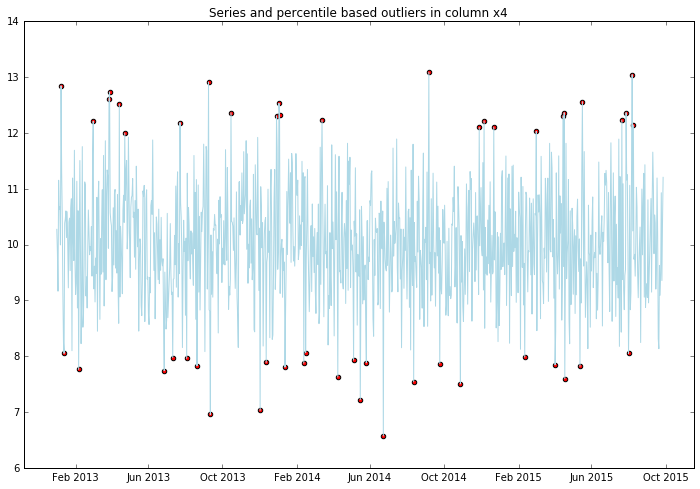

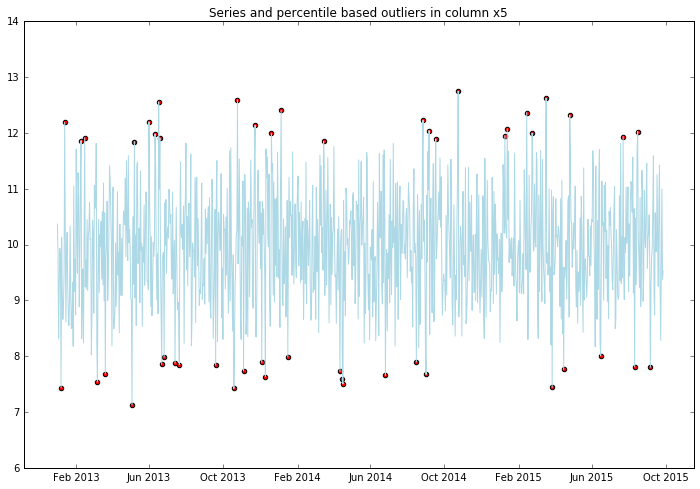

In [11]:
for column in x.columns:
    plot_data_percentile_outliers(x[column], (2.5, 97.5))

## Outlier detection based on mean absolute deviation

Mean absolute deviation in a different way from standard deviation. While standard deviation is the root mean square value of the residuals, mean absolute deviation is the absolute average of the residuals.

### Function to calculate mean absolute deviation

In [12]:
def mad (series):
    mean = np.mean(series)
    abs_residuals = [abs(x -mean) for x in series]
    mad = np.mean(abs_residuals)
    return mad

### Function to find outliers

In [13]:
def outliers_mad(series, n_mads = 3):
    series_mean = np.mean(series)
    series_mad = mad(series)
    def outlier_booleans(value, lower= (series_mean - 3*series_mad), upper= (series_mean + 3* series_mad)):
        if (value < lower) or (value > upper):
            return True
        else:
            return False
    return map(outlier_booleans, series)

### Function to plot outliers along with data in a pandas series

In [14]:
def plot_data_mad_outliers(series):
    outliers = series[outliers_mad(series, 3)]
    plt.figure(figsize = (12,8))
    plt.title("Series and MAD-based outliers in column "+series.name)
    plt.scatter(x = outliers.index, y = outliers.values, c="g")
    plt.hlines(np.mean(series)-3*mad(series),min(series.index), max(series.index), color = "r")
    plt.hlines(np.mean(series)+3*mad(series),min(series.index), max(series.index), color = "r")
    plt.hlines(np.mean(series),min(series.index), max(series.index), color = "gray")
    plt.plot(series, color = "lightblue")
    plt.text
    plt.show()

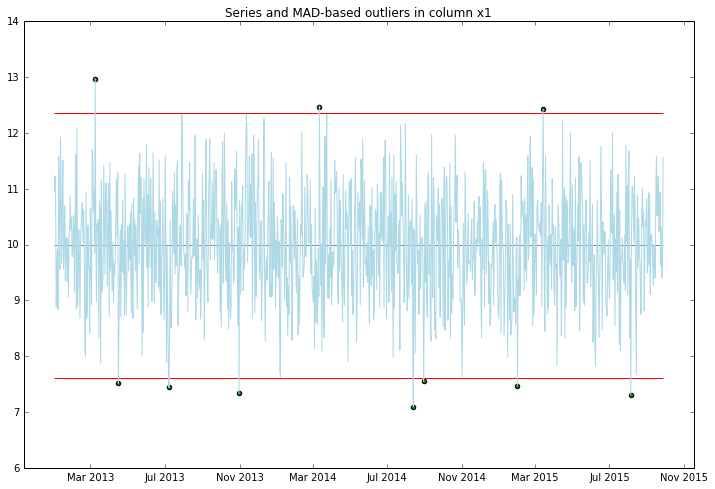

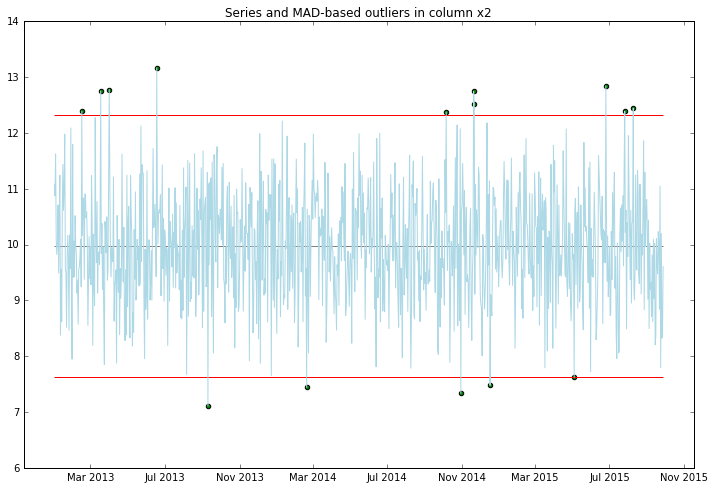

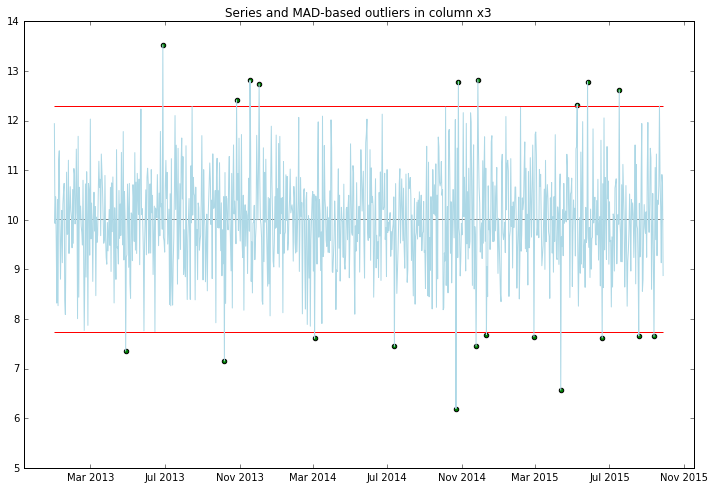

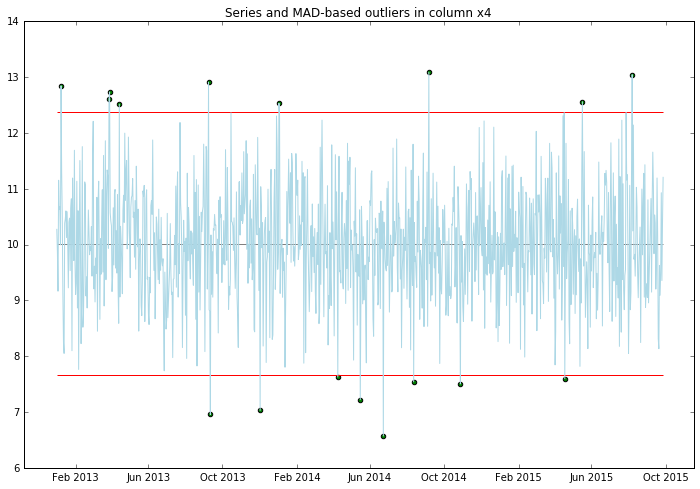

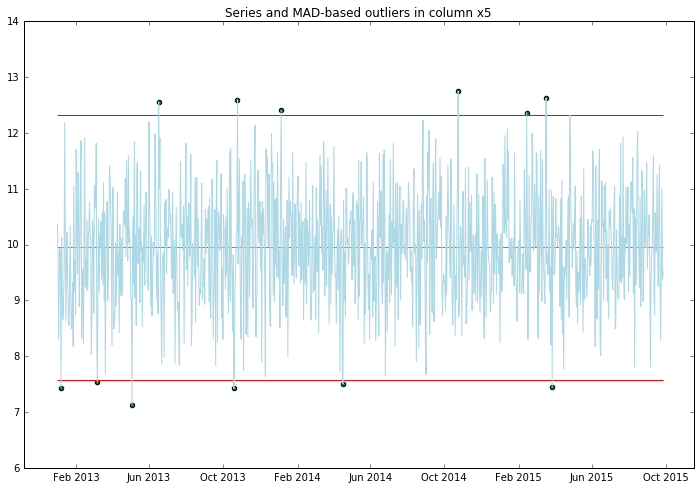

In [15]:
for column in x.columns:
    plot_data_mad_outliers(x[column])

## Comparing outiers found in two different methods

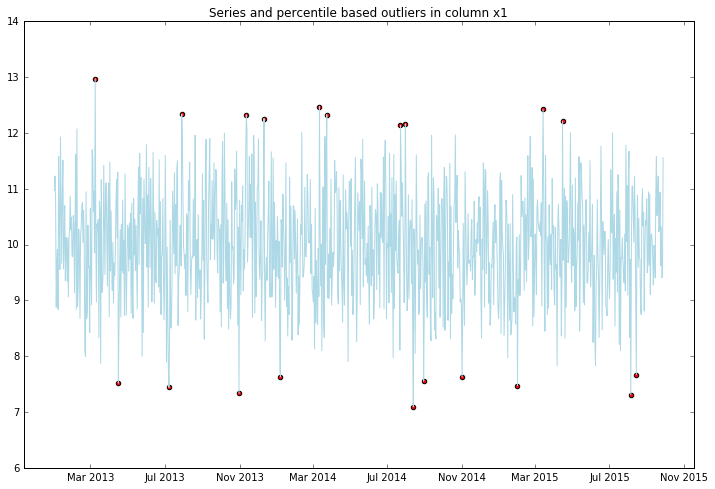

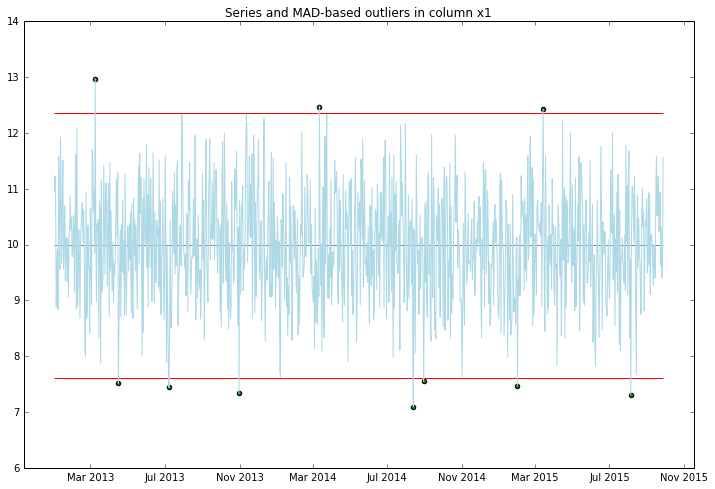

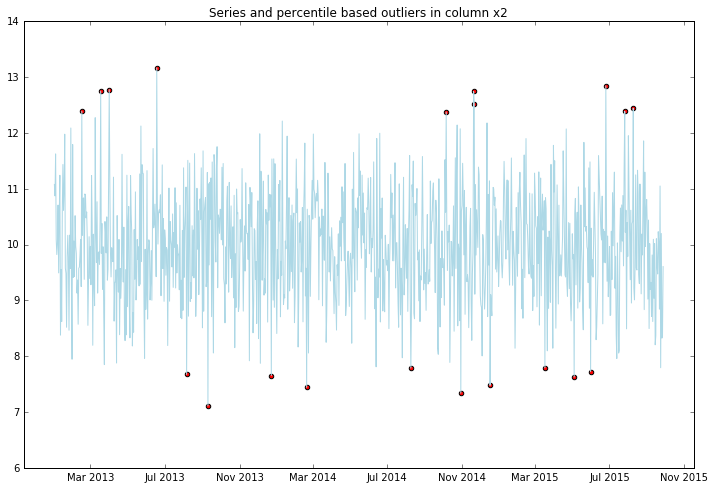

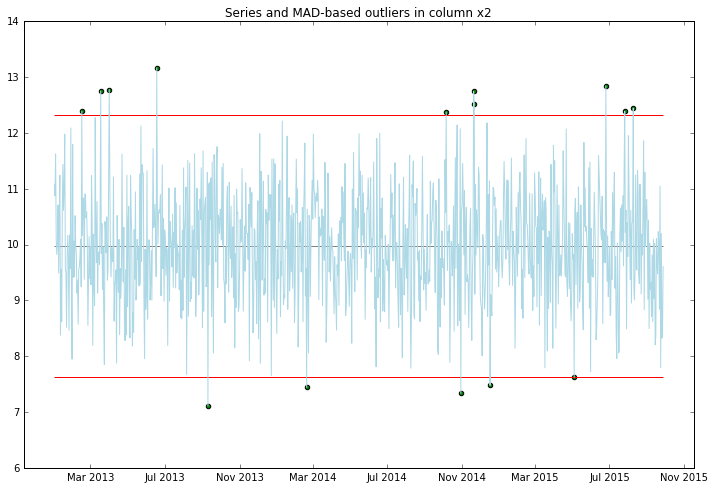

In [16]:
for column in x.columns[0:2]:
    plot_data_percentile_outliers(x[column], [1,99])
    plot_data_mad_outliers(x[column])

## Simple time series anomaly detection

Time series data (like the data we're dealing with) requires special approaches to detect anomalies. One way is to use decision boundaries based on moving averages and moving standard deviations. We can also use bayesian approaches, where we compute the probability of finding points at a certain distance from the mean/median based on the size of the data. Naturally this works well only for large data sets.

### Moving averages and standard deviations to detect anomalies

In [17]:
def outliers_mavg_mstd(series, window = 30, factor = 3):
    series_ma = pd.rolling_mean(series, window)
    series_msd = pd.rolling_std(series, window)
    series_ma = series_ma.fillna(np.mean(series_ma))
    series_msd = series_msd.fillna(np.mean(series_msd))
    #print len(series_ma.dropna()), len(series_msd.dropna()), len(series)
    def outlier_booleans(value):
        lower = series_ma[value[0]]-factor*series_msd[value[0]]
        upper = series_ma[value[0]]+factor*series_msd[value[0]]
        #print lower, upper
        if ((value[1] < lower) or (value[1] > upper)):
            return True
        else:
            return False
    #print series.index
    values = zip(series.index, series)
    return series_ma, series_msd, map(outlier_booleans, values)

In [18]:
def plot_series_ma(series, window, factor):
    series_ma, series_msd, outliers = outliers_mavg_mstd(series, window, factor)
    outliers = series[outliers]
    plt.figure(figsize=(16,8))
    plt.plot(series, c="lightgreen")
    plt.plot(series_ma, c = "k")
    plt.plot(series_ma+factor*series_msd, c = "fuchsia")
    plt.plot(series_ma-factor*series_msd, c = "fuchsia")
    plt.scatter(x = outliers.index, y = outliers.values, c="c")
    plt.title("Series, moving average and limits for " + series.name)

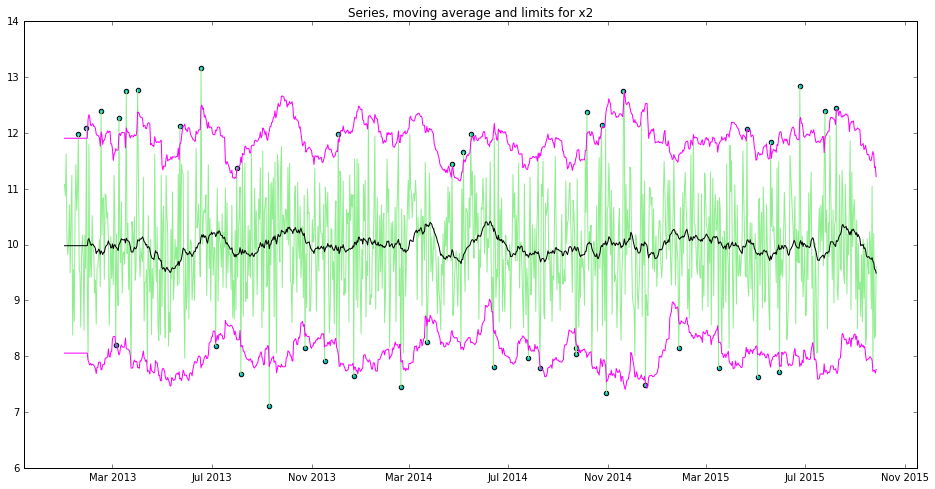

In [19]:
plot_series_ma(x['x2'],30,2)

The above graph shows how values that lie beyond 2.5 moving standard deviations away from the centre line (in this case, that is the moving average line) are identified as outliers.

## Unsupervised Anomaly Detection using a One Class SVM

The One Class SVM built into scikit-learn allows us to train a machine learning model to detect outliers in multivariate data.

* We can train the data on one year's data (in training set) and find outliers based on this in a different set of data
* Variation of two or more variables is considered in finding anomalies
* The results shown up on a bivariate graph can help us find anomalies.

Below, we prepare two sets of input data, train the model on one of these sets, and run a test on one more set. Remember that this isn't supervised classification, so we don't have target values for the model training data. The OneClassSVM object automatically classifies the data into *inliers* and *outliers* based on covariance of the dataset.

### Data Preparation

In [20]:
xtr, xts = x[['x1','x2']][0:365*2], x[['x1','x2']][365*2:365*4]

### Building the model

We build the OneClassSVM model using the scikit learn API. The kernel type RBF (Radial Basis Function) suits problems where higher order decision boundaries are required. The *degree* parameter indicates the degree of the decision boundary, while $\nu$ indicates the percent of points in the dataset to be chosen as outliers.

In [21]:
from sklearn.svm import OneClassSVM
model = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
model.fit(xtr)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.05, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

### Predicting anomalies in the new data set, based on the trained model

In [22]:
anomalies = model.predict(xts)

#Function to transform the default output of the SVM to a boolean 
def transformer(x):
    if x == -1:
        return True
    else:
        return False

results = map(transformer, anomalies)

### Setting up plots to explore the outliers in the data

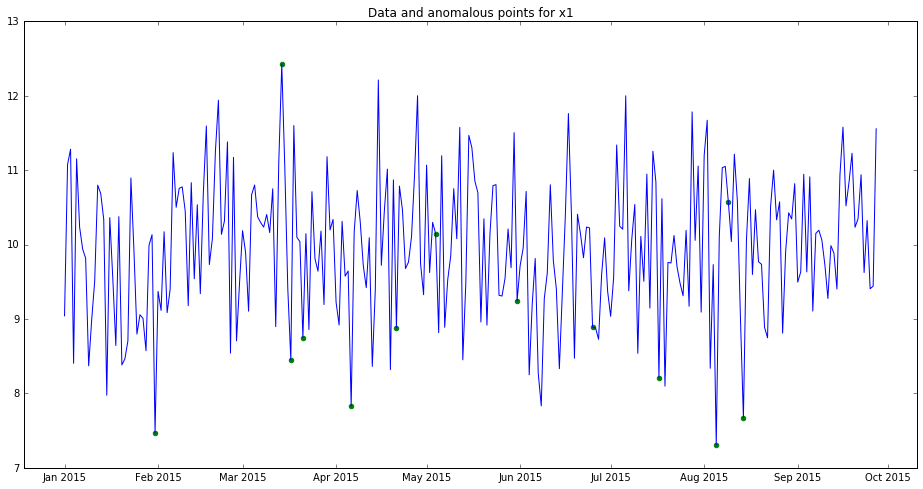

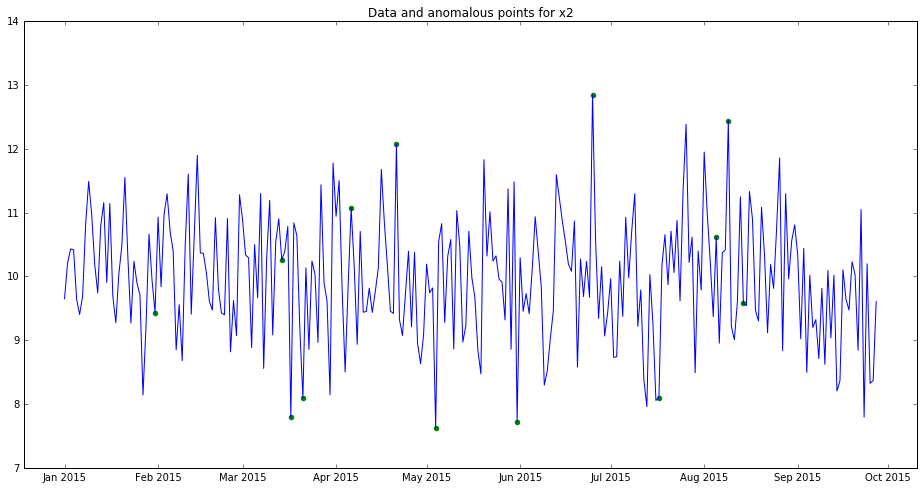

13


In [23]:
results_series = xts[results]
#print results_series
plt.figure(figsize=(16,8))
plt.title("Data and anomalous points for "+xts['x1'].name)
plt.plot(xts['x1'])
plt.scatter(x = results_series['x1'].index, y = results_series['x1'].values, color="g")
plt.show()
plt.figure(figsize=(16,8))
plt.title("Data and anomalous points for "+xts['x2'].name)
plt.plot(xts['x2'])
plt.scatter(x = results_series['x2'].index, y = results_series['x2'].values, color="g")
plt.show()

print len(results_series)

Observe that there are many points that lie close to the centreline, which have also been classified as belong to anomalous readings in the above graph. Bear in mind that the OneClassSVM learns from the covariance of the data, and not the variance of one series alone.

### Visualizing the anomalous points 

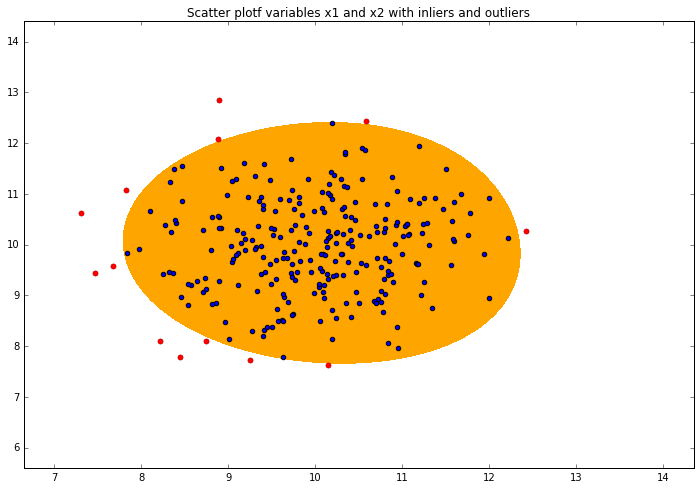

In [24]:
#Plotting the decision function
xx, yy = np.meshgrid(np.linspace(7, 14, 500), np.linspace(6, 14, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,8))
plt.contourf(xx, yy, Z, levels=[0, abs(Z.max())], colors='orange')
plt.title("Scatter plotf variables x1 and x2 with inliers and outliers")
plt.scatter(x = xts['x1'], y = xts['x2'])
plt.scatter(x = results_series['x1'], y = results_series['x2'], color="r")


By adjusting the value of $\nu$ and $\gamma$, we can determine how the outliers get classified. 
* The $\gamma$ parameter determines the complexity of the manifold used to classify. The higher the value, the more complex the topology. 
* The value of $\nu$ determines the upper bound on the percentage of outliers.
* Good thumb rules of $\gamma$ and $\nu$ for this problem are 0.2 and 0.1 respectively.